In [4]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install plotly.express

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px

1.) Working with the Monthly Unemployment Rates as a Percentage Seasonally Adjusted CSV table df1 (URIKOW.csv) from 1/1/2013-8/1/2022.

In [3]:
Econdata = pd.read_csv('C:/Users/theov/OneDrive/Desktop/DAYP/EAP/ECONDATA.csv)

SyntaxError: EOL while scanning string literal (172258363.py, line 1)

In [3]:
df.head(116)

,DATE,INUR,KYUR,OHUR,WVUR
0,1/1/2013,8.2,8.0,7.5,7.1
1,2/1/2013,8.2,8.0,7.6,6.9
2,3/1/2013,8.1,8.0,7.6,6.8
3,4/1/2013,8.0,8.0,7.6,6.7
4,5/1/2013,7.8,8.0,7.6,6.6
...,...,...,...,...,...
111,4/1/2022,2.2,3.9,4.0,3.6
112,5/1/2022,2.2,3.8,3.9,3.5
113,6/1/2022,2.4,3.7,3.9,3.6
114,7/1/2022,2.6,3.7,3.9,3.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    116 non-null    object 
 1   INUR    116 non-null    float64
 2   KYUR    116 non-null    float64
 3   OHUR    116 non-null    float64
 4   WVUR    116 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [5]:
#Used to determine if there are any missing values within CSV table, there are none.
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       DATE   INUR   KYUR   OHUR   WVUR
0    False  False  False  False  False
1    False  False  False  False  False
2    False  False  False  False  False
3    False  False  False  False  False
4    False  False  False  False  False
..     ...    ...    ...    ...    ...
111  False  False  False  False  False
112  False  False  False  False  False
113  False  False  False  False  False
114  False  False  False  False  False
115  False  False  False  False  False

[116 rows x 5 columns]>

In [6]:
#Basic Descriptive statistics on the CSV file for each respective column in the table. These values are for the years 2013-2022. 
df.describe()

,INUR,KYUR,OHUR,WVUR
count,116.000000,116.000000,116.000000,116.000000
mean,4.683621,5.318966,5.490517,5.892241
std,2.105642,1.729937,1.753406,1.531873
min,2.200000,3.700000,3.900000,3.500000
25%,3.400000,4.200000,4.500000,5.000000
50%,4.100000,4.900000,5.000000,5.700000
75%,5.525000,5.300000,5.725000,6.525000
max,16.800000,16.500000,16.400000,15.500000


In [7]:
df.head()

,DATE,INUR,KYUR,OHUR,WVUR
0,1/1/2013,8.2,8.0,7.5,7.1
1,2/1/2013,8.2,8.0,7.6,6.9
2,3/1/2013,8.1,8.0,7.6,6.8
3,4/1/2013,8.0,8.0,7.6,6.7
4,5/1/2013,7.8,8.0,7.6,6.6


In [8]:
#Checking for duplicates in in the "DATE" column. No duplicate dates are found in the DATE column.
df.duplicated(subset=['DATE'])

0      False
1      False
2      False
3      False
4      False
       ...  
111    False
112    False
113    False
114    False
115    False
Length: 116, dtype: bool

In [9]:
#Dropped the KYUR, OHUR, and WVUR columns from data frame. 
#df.drop(['KYUR', 'OHUR', 'WVUR'], axis=1)

Text(0, 0.5, 'Count')

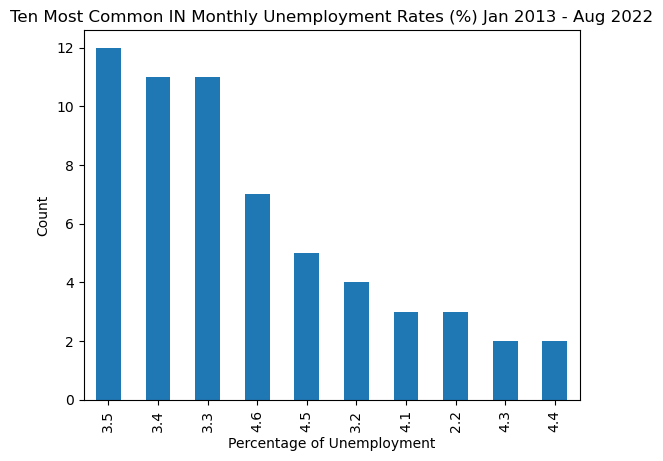

In [10]:
#Understanding the data columns (series). Looking at only INUR (Indiana) series with the frequency of the Unemployment percentage for each of the 116 dates present.
# The top three most frequently occurring monthly unemployment rate percentages are 3.5%, having 12 values present, 3.4%, having 11 values, and 3.3%, having 11 months from 1/1/2013-8/1/2022.
#Overall, Indiana unemployment was on average low for approximately 30% (addeding 12+11+11= 34 / 116 = .0.2931034482758621) of the months in this time series.  
ax = df['INUR'].value_counts().head(10).plot(kind='bar', title="Ten Most Common IN Monthly Unemployment Rates (%) Jan 2013 - Aug 2022")
ax.set_xlabel('Percentage of Unemployment')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

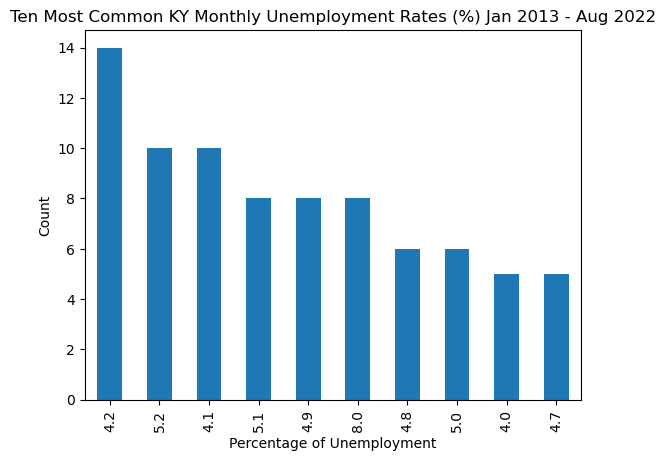

In [11]:
#Understanding the data columns (series). Looking at only KYUR (Kentucky) series with the frequency of the Unemployment percentage for each of the 116 dates present.
# The top three most frequently occurring monthly unemployment rate percentages are 4.2%, having 14 values present, 5.2%, having 10 values, and 4.1%, having 10 months from 1/1/2013-8/1/2022.
#Overall, Kentucky unemployment (Economists deem 3-5% unemployment as ideal) was higher on average than IN Unemployment rate.  
ax = df['KYUR'].value_counts().head(10).plot(kind='bar', title="Ten Most Common KY Monthly Unemployment Rates (%) Jan 2013 - Aug 2022")
ax.set_xlabel('Percentage of Unemployment')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

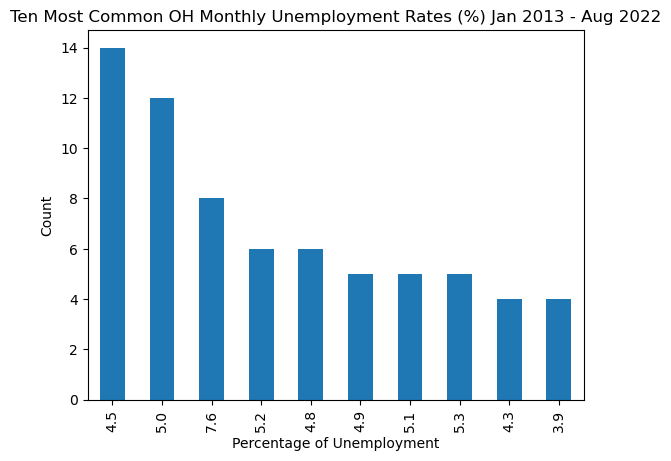

In [12]:
#Understanding the data columns (series). Looking at only OHUR (Ohio)series with the frequency of the Unemployment percentage for each of the 116 dates present.
# The top three most frequently occurring monthly unemployment rate percentages are 4.5%, having 14 values present, 5.0%, having 12 values, and 7.6%, having 8 months from 1/1/2013-8/1/2022.
#Overall, OH unemployment (Economists deem 3-5% unemployment as ideal) was higher on average than KY and IN Unemployment rate.  
ax = df['OHUR'].value_counts().head(10).plot(kind='bar', title="Ten Most Common OH Monthly Unemployment Rates (%) Jan 2013 - Aug 2022")
ax.set_xlabel('Percentage of Unemployment')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

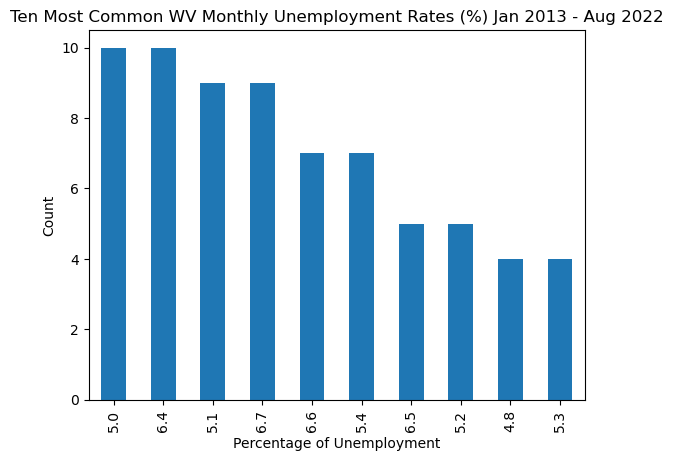

In [22]:
#Understanding the data columns (series). Looking at only WVUR (West Virginia) series with the frequency of the Unemployment percentage for each of the 116 dates present.
# The top three most frequently occurring monthly unemployment rate percentages are 5.0%, having 10 values present, 6.4%, having 10 values, and 5.1%, having 9 months from 1/1/2013-8/1/2022.
#Overall, WV unemployment (Economists deem 3-5% unemployment as ideal) was higher on average than KY, OH, and IN but not determine when compared to OH Unemployment rate.
ax = df['WVUR'].value_counts().head(10).plot(kind='bar', title="Ten Most Common WV Monthly Unemployment Rates (%) Jan 2013 - Aug 2022")
ax.set_xlabel('Percentage of Unemployment')
ax.set_ylabel('Count')

<AxesSubplot:xlabel='DATE'>

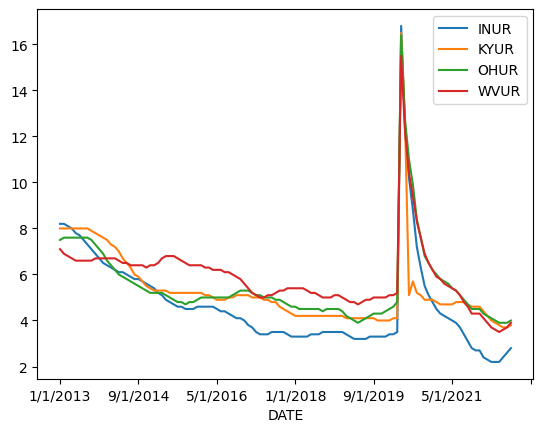

In [27]:
#Only testing the Line chart type
df.plot(x="DATE", y=["INUR", "KYUR", "OHUR", "WVUR"])


2.) Working with Unemployment Rates for IN, KY, OH, and WV for the dates between 1/1/2013-8/1/2022.

In [ ]:
#Replacing any 0 values in the URIKOW table. 
URIKOW = URIKOW.replace(0, np.nan)
URIKOW2 = URIKOW.dropna(subset=['INUR'])

In [ ]:
URIKOW2.describe(include="all")

In [ ]:
#subset of the data for IN unemployment rate 
INU = URIKOW2.groupby('DATE') ['INUR'].sum()
print(INU)

In [ ]:
#subset of the data for KY unemployment rate 
KYU = URIKOW2.groupby('DATE') ['KYUR'].sum()
print(KYU)

In [ ]:
#subset of the data for OH unemployment rate 
OHU = URIKOW2.groupby('DATE') ['OHUR'].sum()
print(OHU)

In [ ]:
#subset of the data for WV unemployment rate 
WVU = URIKOW2.groupby('DATE') ['WVUR'].sum()
print(WVU)

In [ ]:
get_series(series_id='DJIA')

In [ ]:
#Using matplotlib to produce a graph of unemployment rates for the four respective states from 1/1/2013-8/1/2022.
URIKOW2.plot(figsize=(10, 5), Title='Unemployemnt Rate for IN, KY, OH, and WV', lw=1)